In [49]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

1.โหลด csv เข้าไปใน Python Pandas

In [70]:
df = pd.read_csv('https://raw.githubusercontent.com/TawanTan/German_Credit_Risk_Data/master/datasets_9109_12699_german_credit_data.csv')

2. เขียนโค้ดแสดง หัว10แถว ท้าย10แถว และสุ่ม10แถว

In [51]:
df.head(10)

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
0           0   67    male    2     own             NaN           little   
1           1   22  female    2     own          little         moderate   
2           2   49    male    1     own          little              NaN   
3           3   45    male    2    free          little           little   
4           4   53    male    2    free          little           little   
5           5   35    male    1    free             NaN              NaN   
6           6   53    male    2     own      quite rich              NaN   
7           7   35    male    3    rent          little         moderate   
8           8   61    male    1     own            rich              NaN   
9           9   28    male    3     own          little         moderate   

   Credit amount  Duration              Purpose  Risk  
0           1169         6             radio/TV  good  
1           5951        48             radio/TV   bad  
2           2096        12            education  good  
3           7882        42  furniture/equipment  good  
4           4870        24                  car   bad  
5           9055        36            education  good  
6           2835        24  furniture/equipment  good  
7           6948        36                  car  good  
8           3059        12             radio/TV  good  
9           5234        30                  car   bad

In [52]:
df.tail(10)

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
990         990   37    male    1     own             NaN              NaN   
991         991   34    male    1     own        moderate              NaN   
992         992   23    male    1    rent             NaN           little   
993         993   30    male    3     own          little           little   
994         994   50    male    2     own             NaN              NaN   
995         995   31  female    1     own          little              NaN   
996         996   40    male    3     own          little           little   
997         997   38    male    2     own          little              NaN   
998         998   23    male    2    free          little           little   
999         999   27    male    2     own        moderate         moderate   

     Credit amount  Duration              Purpose  Risk  
990           3565        12            education  good  
991           1569        15             radio/TV  good  
992           1936        18             radio/TV  good  
993           3959        36  furniture/equipment  good  
994           2390        12                  car  good  
995           1736        12  furniture/equipment  good  
996           3857        30                  car  good  
997            804        12             radio/TV  good  
998           1845        45             radio/TV   bad  
999           4576        45                  car  good

In [53]:
df.sample(10)

Unnamed: 0  Age     Sex  Job Housing Saving accounts Checking account  \
737         737   35    male    1     own        moderate           little   
847         847   28    male    2     own          little              NaN   
20           20   48    male    2     own          little              NaN   
863         863   32    male    1     own            rich              NaN   
275         275   32    male    2     own          little              NaN   
385         385   25  female    2     own          little              NaN   
102         102   24  female    2     own          little              NaN   
155         155   20  female    2    rent          little           little   
645         645   27    male    2    rent             NaN              NaN   
405         405   22    male    2     own          little         moderate   

     Credit amount  Duration              Purpose  Risk  
737           4380        18                  car  good  
847           1249        24                  car  good  
20            2134         9                  car  good  
863           4526        27  furniture/equipment  good  
275           2697         9             radio/TV  good  
385           2238        18             radio/TV  good  
102            932         6             radio/TV  good  
155           1282        12  furniture/equipment   bad  
645           7980        36             business   bad  
405           2039        24             radio/TV   bad

3. เช็คว่ามีข้อมูลที่หายไปไหม สามารถจัดการได้ตามความเหมาะสม

In [54]:
df.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

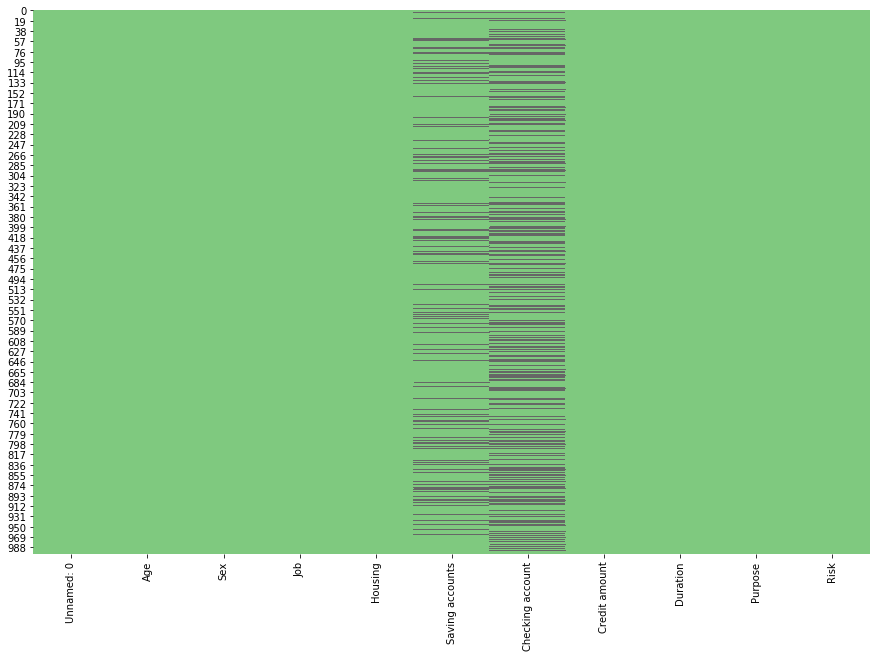

In [21]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), cbar=False, cmap='Accent')

In [71]:
#fill in NaN with "None"
df.fillna('None', inplace=True)
#Drop columns "Unnamed: 0"
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [72]:
#Get Dummies
df = pd.concat([df, pd.get_dummies(df['Sex'], drop_first=True, prefix='Sex')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Housing'], drop_first=True, prefix='Housing')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Saving accounts'], drop_first=True, prefix='Saving accounts')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Checking account'], drop_first=True, prefix='Checking account')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Purpose'], drop_first=True, prefix='Purpose')], axis=1)
df = pd.concat([df, pd.get_dummies(df['Risk'], drop_first=True, prefix='Risk')], axis=1)


In [73]:
#Drop old feature
df.drop('Sex', axis=1, inplace=True)
df.drop('Housing', axis=1, inplace=True)
df.drop('Saving accounts', axis=1, inplace=True)
df.drop('Checking account', axis=1, inplace=True)
df.drop('Purpose', axis=1, inplace=True)
df.drop('Risk', axis=1, inplace=True)

4. ใช้ info และ describe อธิบายข้อมูลเบื้องต้น


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Age                          1000 non-null   int64
 1   Job                          1000 non-null   int64
 2   Credit amount                1000 non-null   int64
 3   Duration                     1000 non-null   int64
 4   Sex_male                     1000 non-null   uint8
 5   Housing_own                  1000 non-null   uint8
 6   Housing_rent                 1000 non-null   uint8
 7   Saving accounts_little       1000 non-null   uint8
 8   Saving accounts_moderate     1000 non-null   uint8
 9   Saving accounts_quite rich   1000 non-null   uint8
 10  Saving accounts_rich         1000 non-null   uint8
 11  Checking account_little      1000 non-null   uint8
 12  Checking account_moderate    1000 non-null   uint8
 13  Checking account_rich        1000 non-null   uint

In [77]:
df.describe()

Age          Job  Credit amount     Duration     Sex_male  \
count  1000.000000  1000.000000    1000.000000  1000.000000  1000.000000   
mean     35.546000     1.904000    3271.258000    20.903000     0.690000   
std      11.375469     0.653614    2822.736876    12.058814     0.462725   
min      19.000000     0.000000     250.000000     4.000000     0.000000   
25%      27.000000     2.000000    1365.500000    12.000000     0.000000   
50%      33.000000     2.000000    2319.500000    18.000000     1.000000   
75%      42.000000     2.000000    3972.250000    24.000000     1.000000   
max      75.000000     3.000000   18424.000000    72.000000     1.000000   

       Housing_own  Housing_rent  Saving accounts_little  \
count  1000.000000   1000.000000             1000.000000   
mean      0.713000      0.179000                0.603000   
std       0.452588      0.383544                0.489521   
min       0.000000      0.000000                0.000000   
25%       0.000000      0.000000                0.000000   
50%       1.000000      0.000000                1.000000   
75%       1.000000      0.000000                1.000000   
max       1.000000      1.000000                1.000000   

       Saving accounts_moderate  Saving accounts_quite rich  ...  \
count               1000.000000                 1000.000000  ...   
mean                   0.103000                    0.063000  ...   
std                    0.304111                    0.243085  ...   
min                    0.000000                    0.000000  ...   
25%                    0.000000                    0.000000  ...   
50%                    0.000000                    0.000000  ...   
75%                    0.000000                    0.000000  ...   
max                    1.000000                    1.000000  ...   

       Checking account_moderate  Checking account_rich  Purpose_car  \
count                1000.000000            1000.000000  1000.000000   
mean                    0.269000               0.063000     0.337000   
std                     0.443662               0.243085     0.472921   
min                     0.000000               0.000000     0.000000   
25%                     0.000000               0.000000     0.000000   
50%                     0.000000               0.000000     0.000000   
75%                     1.000000               0.000000     1.000000   
max                     1.000000               1.000000     1.000000   

       Purpose_domestic appliances  Purpose_education  \
count                   1000.00000        1000.000000   
mean                       0.01200           0.059000   
std                        0.10894           0.235743   
min                        0.00000           0.000000   
25%                        0.00000           0.000000   
50%                        0.00000           0.000000   
75%                        0.00000           0.000000   
max                        1.00000           1.000000   

       Purpose_furniture/equipment  Purpose_radio/TV  Purpose_repairs  \
count                  1000.000000       1000.000000      1000.000000   
mean                      0.181000          0.280000         0.022000   
std                       0.385211          0.449224         0.146757   
min                       0.000000          0.000000         0.000000   
25%                       0.000000          0.000000         0.000000   
50%                       0.000000          0.000000         0.000000   
75%                       0.000000          1.000000         0.000000   
max                       1.000000          1.000000         1.000000   

       Purpose_vacation/others    Risk_good  
count               1000.00000  1000.000000  
mean                   0.01200     0.700000  
std                    0.10894     0.458487  
min                    0.00000     0.000000  
25%                    0.00000     0.000000  
50%                    0.00000     1.000000  
75%                    0.00000   

5. ใช้ pairplot ดูความสัมพันธ์เบื้องต้นของ features ที่สนใจ

<Figure size 864x648 with 0 Axes>

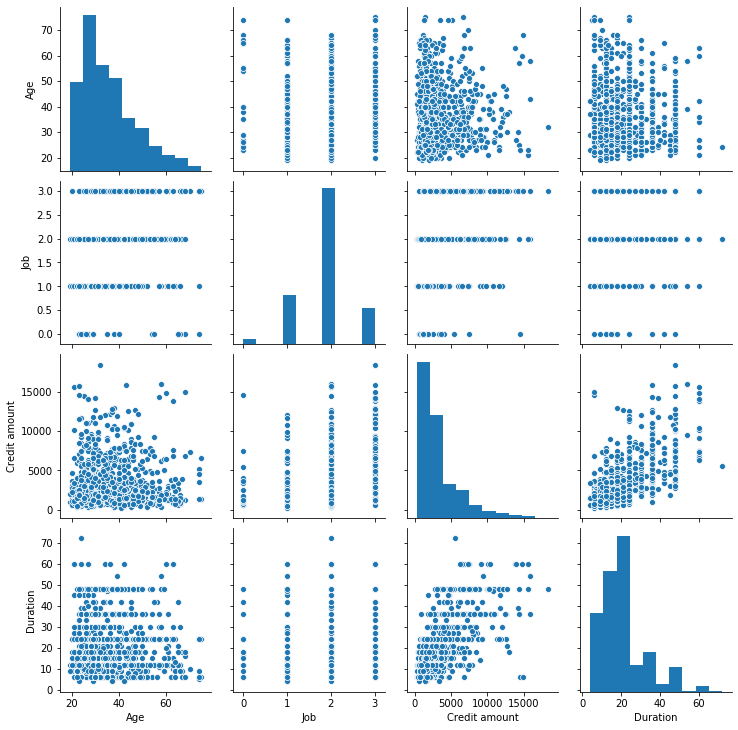

In [90]:
plt.figure(figsize=(12,9))
sns.pairplot(df[['Age', 'Job', 'Credit amount', 'Duration']])

6. ใช้ displot เพื่อดูการกระจายของแต่ละคอลัมน์

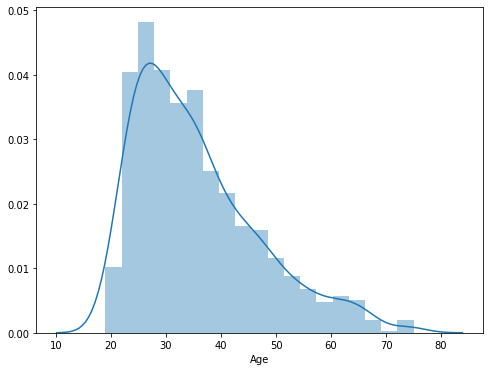

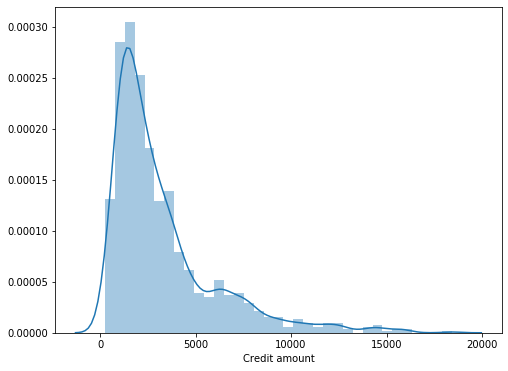

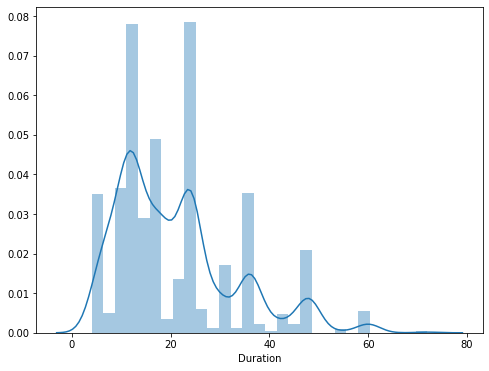

In [81]:
for i in df[['Age', 'Credit amount', 'Duration']] :
    plt.figure(figsize=(8,6))
    sns.distplot(df[i])

7. ใช้ heatmap ดูความสัมพันธ์ของคอลัมน์ที่สนใจ

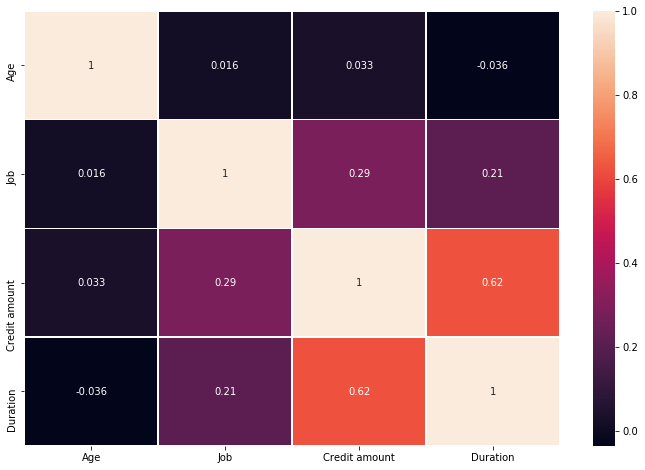

In [85]:
plt.figure(figsize=(12,8))
sns.heatmap(df[['Age', 'Job', 'Credit amount', 'Duration']].corr(), annot=True, linewidth=0.5, linecolor='white')

8. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation สูงสุด

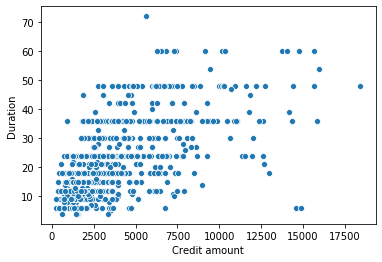

In [88]:
sns.scatterplot(x='Credit amount', y='Duration', data=df)

9. สร้าง scatter plot ของความสัมพันธ์ที่มี Correlation ต่ำสุด

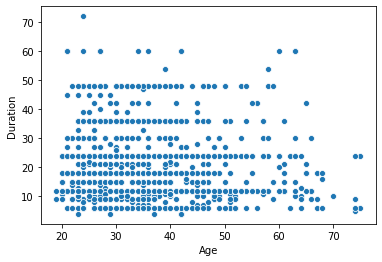

In [89]:
sns.scatterplot(x='Age', y='Duration', data=df)

10. สร้าง histogram ของ feature ที่สนใจ

(array([445., 293.,  97.,  80.,  38.,  19.,  14.,   8.,   5.,   1.]),
 array([  250. ,  2067.4,  3884.8,  5702.2,  7519.6,  9337. , 11154.4,
        12971.8, 14789.2, 16606.6, 18424. ]),
 <a list of 10 Patch objects>)

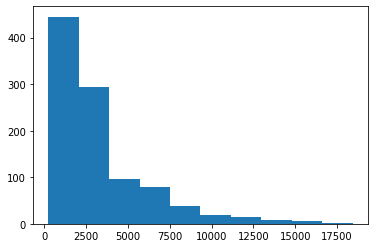

In [94]:
plt.hist(df['Credit amount'])

(array([149., 262., 177., 155.,  89.,  72.,  42.,  26.,  21.,   7.]),
 array([19. , 24.6, 30.2, 35.8, 41.4, 47. , 52.6, 58.2, 63.8, 69.4, 75. ]),
 <a list of 10 Patch objects>)

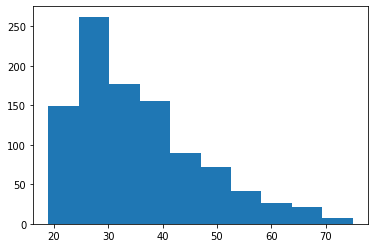

In [99]:
plt.hist(df['Age'])

11. สร้าง box plot ของ features ที่สนใจ

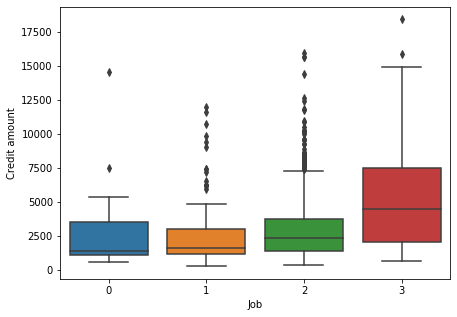

In [101]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Job', y='Credit amount', data=df)

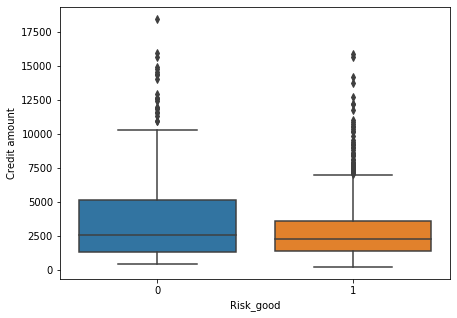

In [103]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Risk_good', y='Credit amount', data=df)

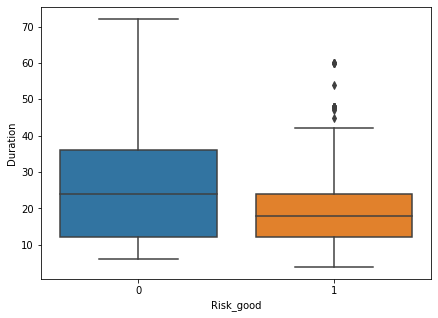

In [104]:
plt.figure(figsize=(7,5))
sns.boxplot(x='Risk_good', y='Duration', data=df)

12. สร้าง train/test split ของข้อมูล สามารถลองทดสอบ 70:30, 80:20, 90:10 ratio ได้ตามใจ

In [105]:
from sklearn.model_selection import train_test_split

In [111]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Risk_good', axis=1), df['Risk_good'], test_size=0.2, random_state=100)

13. ทำ Data Visualization อื่นๆ (แล้วแต่เลือก)

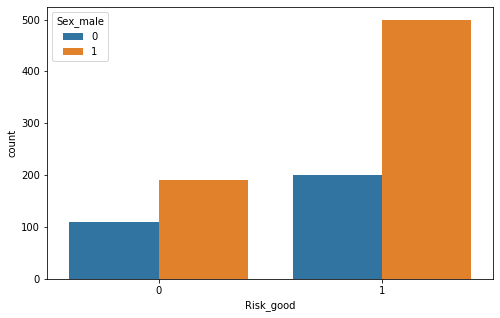

In [116]:
plt.figure(figsize=(8,5))
sns.countplot(x='Risk_good', data=df, hue='Sex_male')

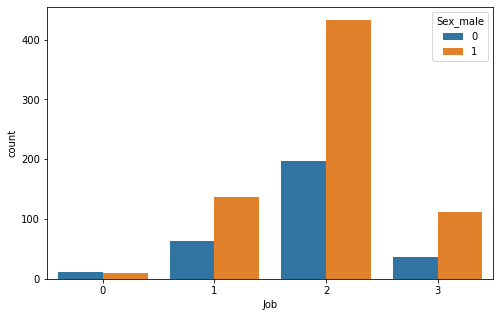

In [119]:
plt.figure(figsize=(8,5))
sns.countplot(x='Job', data=df, hue='Sex_male')

14. พิจารณาว่าควรทำ Normalization หรือ Standardization หรือไม่ควรทั้งสองอย่าง พร้อมให้เหตุผล 

In [124]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [144]:
#Normalization after sliptting
min_max_scaler1 = MinMaxScaler()
min_max_scaler2 = MinMaxScaler()
arr_minmax1 = min_max_scaler1.fit_transform(X_train)
arr_minmax2 = min_max_scaler2.fit_transform(X_test)
X_n_af_train = pd.DataFrame(arr_minmax1, columns=df.columns[:-1])
X_n_af_test = pd.DataFrame(arr_minmax2, columns=df.columns[:-1])

In [125]:
#Standardization after sliptting
sc_X_train = StandardScaler()
sc_X_test = StandardScaler()
arr_minmax3 = sc_X_train.fit_transform(X_train)
arr_minmax4 = sc_X_test.fit_transform(X_test)
X_std_af_train = pd.DataFrame(arr_minmax3, columns=df.columns[:-1])
X_std_af_test = pd.DataFrame(arr_minmax4, columns=df.columns[:-1])

In [126]:
#Normalization before splitting
min_max_scaler3 = MinMaxScaler()
arr_minmax5 = min_max_scaler3.fit_transform(df.drop('Risk_good', axis=1))
X_n_be_train, X_n_be_test = train_test_split(df.drop('Risk_good', axis=1), test_size=0.2, random_state=100)

In [127]:
#Standardization before spliting
sc = StandardScaler()
arr_minmax6 = sc.fit_transform(df.drop('Risk_good', axis=1))
X_std_be_train, X_std_be_test = train_test_split(df.drop('Risk_good', axis=1), test_size=0.2, random_state=100)

15. เลือกช้อยที่ดีที่สุดจากข้อ 14 (หรือจะทำทุกอันแล้วนำมาเปรียบเทียบก็ได้)

In [129]:
from sklearn.tree import DecisionTreeClassifier

In [131]:
#Defalt
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [135]:
predicted = dtree.predict(X_test)

In [146]:
#Normalization after sliptting
dtree_norm = DecisionTreeClassifier()
dtree_norm.fit(X_n_af_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [147]:
predicted_norm = dtree_norm.predict(X_n_af_test)

In [133]:
#Standardization after sliptting
dtree_std = DecisionTreeClassifier()
dtree_std.fit(X_std_af_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [148]:
predicted_std = dtree_std.predict(X_std_af_test)

16. วัดผลโมเดล โดยใช้ confusion matrix และ ประเมินผลด้วยคะแนน Accuracy, 
F1 score, Recall, Precision

In [134]:
from sklearn.metrics import  confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

Text(33.0, 0.5, 'Actual')

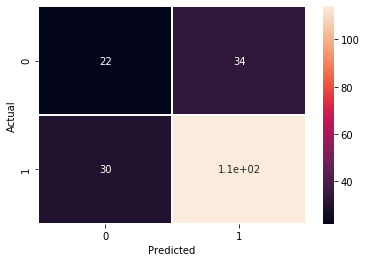

In [149]:
#Defalt
confu1 = confusion_matrix(y_test, predicted)
sns.heatmap(confu1, annot=True, linewidths=0.5, linecolor='white')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [150]:
print('Accuracy = ', accuracy_score(y_test, predicted))
print('F1_score = ', f1_score(y_test, predicted))
print('Precision = ', precision_score(y_test, predicted))
print('Recall = ', recall_score(y_test, predicted))

Accuracy =  0.68
F1_score =  0.7808219178082192
Precision =  0.7702702702702703
Recall =  0.7916666666666666


Text(33.0, 0.5, 'Actual')

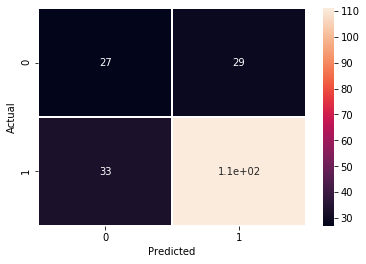

In [151]:
#Normalization after sliptting
confu2 = confusion_matrix(y_test, predicted_norm)
sns.heatmap(confu2, annot=True, linewidths=0.5, linecolor='white')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [152]:
print('Accuracy = ', accuracy_score(y_test, predicted_norm))
print('F1_score = ', f1_score(y_test, predicted_norm))
print('Precision = ', precision_score(y_test, predicted_norm))
print('Recall = ', recall_score(y_test, predicted_norm))

Accuracy =  0.69
F1_score =  0.7816901408450704
Precision =  0.7928571428571428
Recall =  0.7708333333333334


Text(33.0, 0.5, 'Actual')

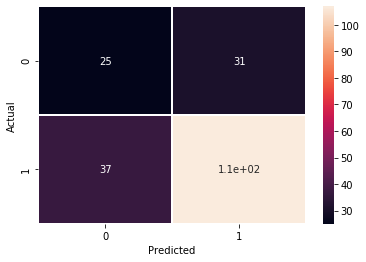

In [153]:
#Standardization after sliptting
confu3 = confusion_matrix(y_test, predicted_std)
sns.heatmap(confu3, annot=True, linewidths=0.5, linecolor='white')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [154]:
print('Accuracy = ', accuracy_score(y_test, predicted_std))
print('F1_score = ', f1_score(y_test, predicted_std))
print('Precision = ', precision_score(y_test, predicted_std))
print('Recall = ', recall_score(y_test, predicted_std))

Accuracy =  0.66
F1_score =  0.7588652482269502
Precision =  0.7753623188405797
Recall =  0.7430555555555556


17. หาค่า parameter combination ที่ดีที่สุด สำหรับ Dataset นี้ โดยใช้ GridSearch (Hyperparameter Tuning)

In [155]:
from sklearn.model_selection import GridSearchCV

In [157]:
param_combination = {'max_depth' : [4, 8, 16, 32, 64, 128, 256], 'min_samples_leaf' : [1, 2, 4, 8, 12, 16, 20]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=param_combination, verbose=3)
grid_search.fit(X_train, y_train)

, min_samples_leaf=20, score=0.706, total=   0.0s
[CV] max_depth=32, min_samples_leaf=1 ................................
[CV] .... max_depth=32, min_samples_leaf=1, score=0.706, total=   0.0s
[CV] max_depth=32, min_samples_leaf=1 ................................
[CV] .... max_depth=32, min_samples_leaf=1, score=0.625, total=   0.0s
[CV] max_depth=32, min_samples_leaf=1 ................................
[CV] .... max_depth=32, min_samples_leaf=1, score=0.713, total=   0.0s
[CV] max_depth=32, min_samples_leaf=1 ................................
[CV] .... max_depth=32, min_samples_leaf=1, score=0.637, total=   0.0s
[CV] max_depth=32, min_samples_leaf=1 ................................
[CV] .... max_depth=32, min_samples_leaf=1, score=0.675, total=   0.0s
[CV] max_depth=32, min_samples_leaf=2 ................................
[CV] .... max_depth=32, min_samples_leaf=2, score=0.631, total=   0.0s
[CV] max_depth=32, min_samples_leaf=2 ................................
[CV] .... max_depth=32, min

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 8, 16, 32, 64, 128, 256],
       

In [158]:
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 16}


In [159]:
predicted_grid = grid_search.predict(X_test)

Text(33.0, 0.5, 'Actual')

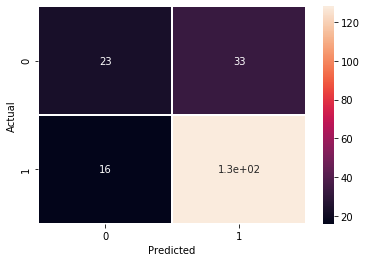

In [161]:
confu4 = confusion_matrix(y_test, predicted_grid)
sns.heatmap(confu4, annot=True, linewidths=0.5, linecolor='white')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [162]:
print('Accuracy = ', accuracy_score(y_test, predicted_grid))
print('F1_score = ', f1_score(y_test, predicted_grid))
print('Precision = ', precision_score(y_test, predicted_grid))
print('Recall = ', recall_score(y_test, predicted_grid))

Accuracy =  0.755
F1_score =  0.8393442622950819
Precision =  0.7950310559006211
Recall =  0.8888888888888888


18. เลือกเฉพาะ features ที่สนใจมาเทรนโมเดล และวัดผลเปรียบเทียบกับแบบ all-features

In [174]:
X_ft_train, X_ft_test = train_test_split(df[['Age', 'Sex_male', 'Purpose_car', 'Purpose_domestic appliances', 'Purpose_education', 'Purpose_furniture/equipment',                                                'Purpose_radio/TV', 'Purpose_repairs', 'Purpose_vacation/others']], test_size=0.2, random_state=100)

In [178]:
dtree_ft = DecisionTreeClassifier()
dtree_ft.fit(X_ft_train, y_train)
predicted_ft = dtree_ft.predict(X_ft_test)

Text(33.0, 0.5, 'Actual')

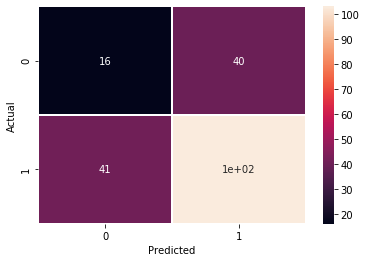

In [179]:
confu5 = confusion_matrix(y_test, predicted_ft)
sns.heatmap(confu5, annot=True, linewidths=0.5, linecolor='white')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [180]:
print('Accuracy = ', accuracy_score(y_test, predicted_ft))
print('F1_score = ', f1_score(y_test, predicted_ft))
print('Precision = ', precision_score(y_test, predicted_ft))
print('Recall = ', recall_score(y_test, predicted_ft))

Accuracy =  0.595
F1_score =  0.7177700348432056
Precision =  0.7202797202797203
Recall =  0.7152777777777778


19. ทำ Visualization ของค่า F1 Score ระหว่าง ผลลัพธ์ที่ได้จากค่า Default, ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization
20. ทำ Visualization ของค่า Recall ระหว่าง ผลลัพธ์ที่ได้จากค่า Default, ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization
21. ทำ Visualization ของค่า Accuracy ระหว่าง ผลลัพธ์ที่ได้จากค่า Default, ผลลัพธ์ที่ได้จากการใช้ Grid Search และ ผลลัพธ์ของ Normalization


In [184]:
value = {'F1 score' : [f1_score(y_test, predicted), f1_score(y_test, predicted_grid),f1_score(y_test, predicted_norm)],
         'Recall' : [recall_score(y_test, predicted), recall_score(y_test, predicted_grid), recall_score(y_test, predicted_norm)],
         'Accuracy' : [accuracy_score(y_test, predicted), accuracy_score(y_test, predicted_grid), accuracy_score(y_test, predicted_norm)],
         'Name' : ['Default', 'Grid Search', 'Normalization']}

In [185]:
df_m = pd.DataFrame(value)
df_m

F1 score    Recall  Accuracy           Name
0  0.780822  0.791667     0.680        Default
1  0.839344  0.888889     0.755    Grid Search
2  0.781690  0.770833     0.690  Normalization

In [186]:
import plotly.express as px

In [187]:
fig = px.bar(df_m, x=df_m['Name'], y=df_m['F1 score'], color=df_m['F1 score'])
fig.show()

In [188]:
fig = px.bar(df_m, x=df_m['Name'], y=df_m['Recall'], color=df_m['Recall'])
fig.show()

In [189]:
fig = px.bar(df_m, x=df_m['Name'], y=df_m['Accuracy'], color=df_m['Accuracy'])
fig.show()

22. สามารถใช้เทคนิคใดก็ได้ตามที่สอนมา ใช้ Decision Tree Algorithm แล้วให้ผลลัพธ์ที่ดีที่สุดที่เป็นไปได้ (อาจจะรวม Grid Search กับ Normalization/Standardization ?)

In [190]:
#Grid + Norm
param_combination = {'max_depth' : [4, 8, 16, 32, 64, 128, 256], 'min_samples_leaf' : [1, 2, 4, 8, 12, 16, 20]}
grid_search_norm = GridSearchCV(DecisionTreeClassifier(), param_grid=param_combination, verbose=3)
grid_search_norm.fit(X_n_af_train, y_train)

, min_samples_leaf=20, score=0.706, total=   0.0s
[CV] max_depth=32, min_samples_leaf=1 ................................
[CV] .... max_depth=32, min_samples_leaf=1, score=0.700, total=   0.0s
[CV] max_depth=32, min_samples_leaf=1 ................................
[CV] .... max_depth=32, min_samples_leaf=1, score=0.631, total=   0.0s
[CV] max_depth=32, min_samples_leaf=1 ................................
[CV] .... max_depth=32, min_samples_leaf=1, score=0.700, total=   0.0s
[CV] max_depth=32, min_samples_leaf=1 ................................
[CV] .... max_depth=32, min_samples_leaf=1, score=0.669, total=   0.0s
[CV] max_depth=32, min_samples_leaf=1 ................................
[CV] .... max_depth=32, min_samples_leaf=1, score=0.675, total=   0.0s
[CV] max_depth=32, min_samples_leaf=2 ................................
[CV] .... max_depth=32, min_samples_leaf=2, score=0.644, total=   0.0s
[CV] max_depth=32, min_samples_leaf=2 ................................
[CV] .... max_depth=32, min

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': [4, 8, 16, 32, 64, 128, 256],
       

In [191]:
print(grid_search.best_params_)

{'max_depth': 8, 'min_samples_leaf': 16}


In [192]:
predicted_grid_norm = grid_search_norm.predict(X_n_af_test)

Text(33.0, 0.5, 'Actual')

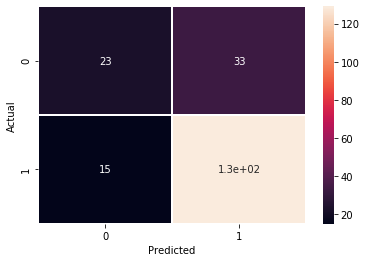

In [193]:
confu6 = confusion_matrix(y_test, predicted_grid_norm)
sns.heatmap(confu6, annot=True, linewidths=0.5, linecolor='white')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [194]:
print('Accuracy = ', accuracy_score(y_test, predicted_grid_norm))
print('F1_score = ', f1_score(y_test, predicted_grid_norm))
print('Precision = ', precision_score(y_test, predicted_grid_norm))
print('Recall = ', recall_score(y_test, predicted_grid_norm))

Accuracy =  0.76
F1_score =  0.8431372549019608
Precision =  0.7962962962962963
Recall =  0.8958333333333334
